# One class SVM and NN

In [1]:
from occ.occ import *

file = "../od_data/satimage.mat"

oc_svdd = occ()
oc_svdd.load_data_mat(file)
oc_svdd.train(model='deepsvdd', hidden_neurons=[64,128], epochs=100, norm=True)
Y_scores_oc_svdd = oc_svdd.get_score(norm=True)
Y_hat_oc_svdd = oc_svdd.predict(norm=True)

ocsvm = occ()
ocsvm.load_data_mat(file)
ocsvm.train(model='ocsvm', kernel='rbf', norm=True) # If norm=True, data will be normalized(L2)
Y_scores_ocsvm = ocsvm.get_score(norm=True)
Y_hat_ocsvm = ocsvm.predict(norm=True)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2304      
_________________________________________________________________
kernel_output (Dense)        (None, 128)               8192      
_________________________________________________________________
hypersphere_distance (Hypers (None,)                   1         
_________________________________________________________________
tf_op_layer_Maximum (TensorF [(None,)]                 0         
_________________________________________________________________
tf_op_layer_Mean (TensorFlow [()]                      0         
______________________________________________

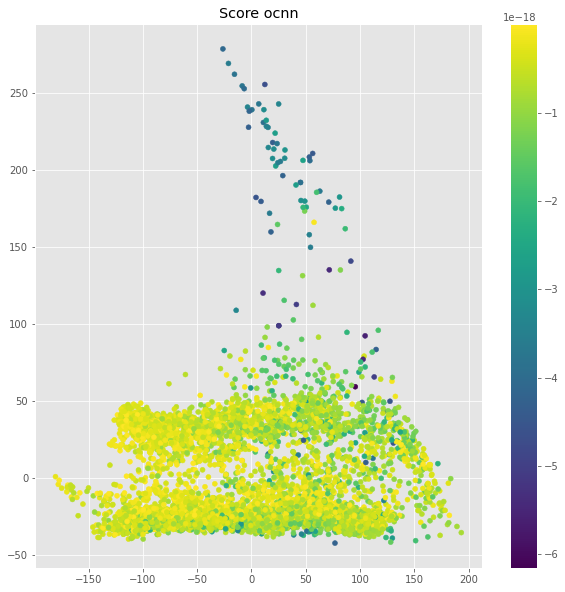

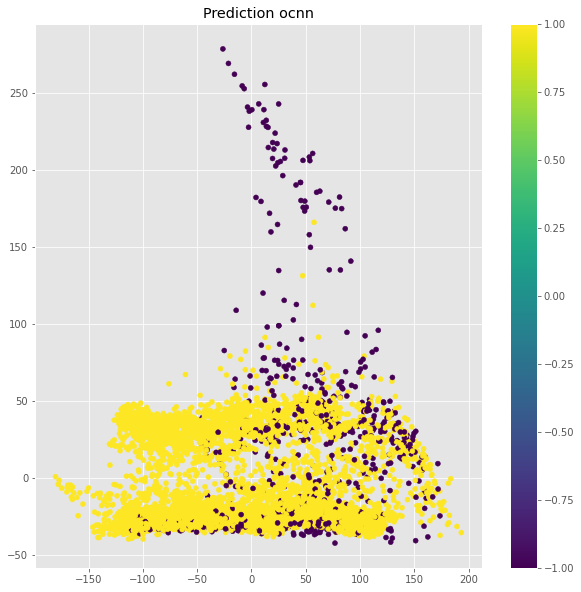

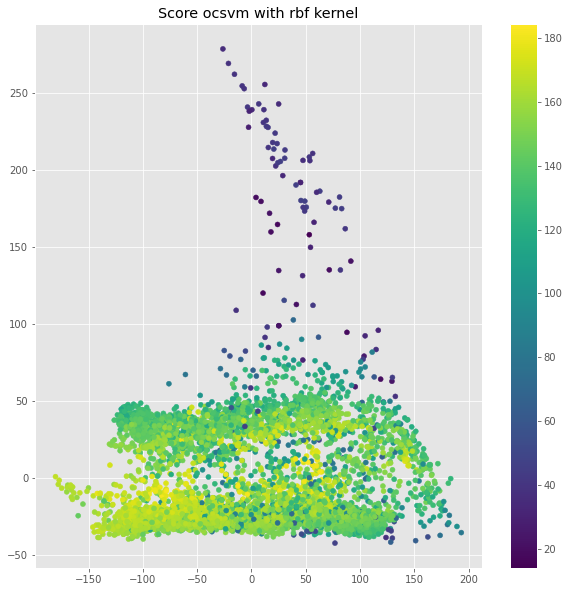

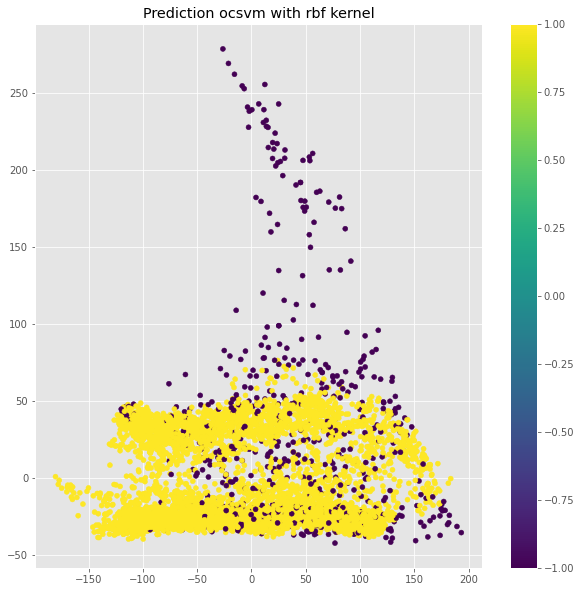

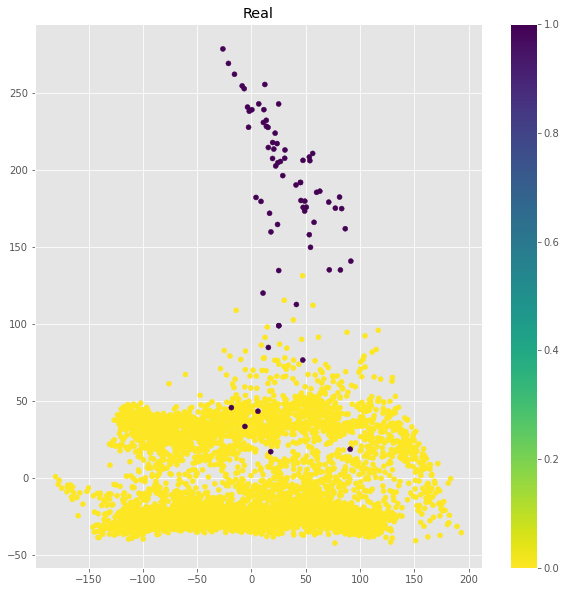

In [2]:
occ.show_projection(oc_svdd.X, Y_scores_oc_svdd, title="Score svdd", markersize=100)
occ.show_projection(oc_svdd.X, Y_hat_oc_svdd, title="Prediction svdd", markersize=100)

occ.show_projection(ocsvm.X, Y_scores_ocsvm, title="Score ocsvm with rbf kernel", markersize=100)
occ.show_projection(ocsvm.X, Y_hat_ocsvm, title="Prediction ocsvm with rbf kernel", markersize=100)

occ.show_projection(ocsvm.X, ocsvm.Y, title="Real", markersize=100, cmap='viridis_r')

In [5]:
ocsvm.export_outliers("outliers.csv", Y_hat) ## Raw data of outliers
ocsvm.export_csv("scores.csv", Y_scores) ## Raw data with scores
ocsvm.export_csv("predictions.csv", Y_hat) ## Raw data with predictions